# An Analysis of Rental Prices of Apartments in Texas
### Members:
    Mohammed Touseef Ansari
    Jerry Nguyen
    Cadence Parker
    Nadia Nafeesa Binti Rashid

### Introduction:
As first year students living on residence, we are fortunate to not think about our commute, cooking, and therefore be able to focus on the task at hands and that is studying. However, as our finals are approaching, we are faced with the imminent need to find housing. Therefore, we were inspired to assess the following dataset, taken from **UC Irvine Machine Leaning Repository**:https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified

This dataset contains 100,000 obersvations in 2019 of listed rentals, mainly apartments, across the US and the city it is located in. Which includes the following variables:
- `id = unique identifier of apartment`
- `category = category of classified`
- `title = title text of apartment`
- `body = body text of apartment`
- `amenities = like AC, basketball,cable, gym, internet access, pool, refrigerator etc`
- `bathrooms = number of bathrooms`
- `bedrooms = number of bedrooms`
- `currency = price in current`
- `fee = fee`
- `has_photo = photo of apartment`
- `pets_allowed = what pets are allowed dogs/cats etc.`
- `price = rental price of apartment`
- `price_display = price converted into display for reader`
- `price_type = price in USD`
- `square_feet = size of the apartment`
- `address =  where the apartment is located`
- `cityname =  where the apartment is located`
- `state =  where the apartment is located`
- `latitude = where the apartment is located`
- `longitude = where the apartment is located`
- `source = origin of classified`
- `time = when classified was created`

We will use this dataset to predict the average price of a rental based on their size and try to answer this question:
- **What is the relationship between square footage and monthly rental prices in Texas? And how accurately does this correlation apply to the top 3 urban cities in Texas?**

The reason we are using Texas is because through our time exploring the data, we found that Texas has the highest count of rentals in the dataset.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readr)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

### Methods: Exploratory Data Analysis

In [2]:
# URL of the dataset
url <- "https://raw.githubusercontent.com/LightAwesome/apartment_rent_analysis/main/data/apartments_for_rent_classified_100K.csv"

# Read the dataset
apartments <- read_csv2(url)

# Display the first few rows of the dataset
head(apartments)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 98924 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (15): category, title, body, amenities, bathrooms, currency, fee, has_ph...
dbl  (5): id, bedrooms, price, square_feet, time
num  (2): latitude, longitude

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id         category               title                          
1 5668640009 housing/rent/apartment One BR 507 & 509 Esplanade     
2 5668639818 housing/rent/apartment Three BR 146 Lochview Drive    
3 5668639686 housing/rent/apartment Three BR 3101 Morningside Drive
4 5668639659 housing/rent/apartment Two BR 209 Aegean Way          
5 5668639374 housing/rent/apartment One BR 4805 Marquette NE       
6 5668639368 housing/rent/apartment Two BR 7801 Marble NE          
  body                                                                                                                                                        
1 This unit is located at 507 & 509 Esplanade, Redondo Beach, 90277, CAMonthly rental rates range from $2195We have 1 beds units available for rent           
2 This unit is located at 146 Lochview Drive, Newport News, 23602, VAMonthly rental rates range from $1250We have 3 beds units available for rent             
3 This unit is located at 3101 Morningside Drive, Raleigh, 27607, NCMonthly rental rates range from $1395We have 3 beds units available for rent              
4 This unit is located at 209 Aegean Way, Vacaville, 95687, CAMonthly rental rates range from $1600 - $1725We have 2 beds units available for rent            
5 This unit is located at 4805 Marquette NE, Albuquerque, 87108, NMMonthly rental rates range from $975 - $1100We have one - two beds units available for rent
6 This unit is located at 7801 Marble NE, Albuquerque, 87110, NMMonthly rental rates range from $1250 - $1300We have 2 beds units available for rent          
  amenities bathrooms bedrooms currency fee has_photo ⋯ price_display
1 null      1         1        USD      No  Thumbnail ⋯ $2,195       
2 null      1.5       3        USD      No  Thumbnail ⋯ $1,250       
3 null      2         3        USD      No  Thumbnail ⋯ $1,395       
4 null      1         2        USD      No  Thumbnail ⋯ $1,600       
5 null      1         1        USD      No  Thumbnail ⋯ $975         
6 null      1.5       2        USD      No  Thumbnail ⋯ $1,250       
  price_type square_feet address             cityname      state latitude
1 Monthly     542        507  509 Esplanade  Redondo Beach CA    338520  
2 Monthly    1500        146 Lochview Dr     Newport News  VA    370867  
3 Monthly    1650        3101 Morningside Dr Raleigh       NC    358230  
4 Monthly     820        209 Aegean Way      Vacaville     CA    383622  
5 Monthly     624        4805 Marquette NE   Albuquerque   NM    351038  
6 Monthly     965        7801 Marble NE      Albuquerque   NM    351038  
  longitude source    time      
1 -1183759  RentLingo 1577360355
2  -764941  RentLingo 1577360340
3  -786438  RentLingo 1577360332
4 -1219712  RentLingo 1577360330
5 -1066110  RentLingo 1577360308
6 -1066110  RentLingo 1577360308

_Figure 1: Our raw dataset - without cleaning or filtering out unnecessary variables_

In [3]:
#The following code is used to isolate for the rental that is classified as "Monthly".
#We also filtered out for unnecessary variables like amenities, price_type, currency, time, etc...that does not contribute to our analysis.
apt_wrangled <- apartments |>
                filter(bathrooms != 'null')|>
                filter(bedrooms != 'null')|>
                filter(price_type == "Monthly")|>
                mutate(bathrooms = as.numeric(bathrooms))|>
                mutate(bedrooms = as.numeric(bedrooms))|>
                mutate(category = as.factor(category))|>
                mutate(category = fct_recode(category,
                                            'Apartment' = 'housing/rent/apartment',
                                            'Home' = 'housing/rent/home',
                                            'Short Term' = 'housing/rent/short_term'))|>
                # mutate(time = as.POSIXct(time, origin="1970-01-01"))|>
                select(-amenities, - price_type, -currency, -time, -source,  -latitude,- longitude, -pets_allowed, -price_display, 
                       -address, -title, -body, -fee, -has_photo, -id)
#We also filter out "null" values - for bedroom and bathrooms.
   
head(apt_wrangled)


category  bathrooms bedrooms price square_feet cityname      state
1 Apartment 1.0       1        2195   542        Redondo Beach CA   
2 Apartment 1.5       3        1250  1500        Newport News  VA   
3 Apartment 2.0       3        1395  1650        Raleigh       NC   
4 Apartment 1.0       2        1600   820        Vacaville     CA   
5 Apartment 1.0       1         975   624        Albuquerque   NM   
6 Apartment 1.5       2        1250   965        Albuquerque   NM

_Figure 2: The first 6 rows of the cleaned data frame which filtered out unnecessary information_

In [4]:
#This line of code is part of our exploratory data analysis - where we group the apartments by state and see which one has the highest count of monthly rentals.
apt_top_state <-  apt_wrangled |>
            group_by (state)|>
            summarize(count = n())|>
            arrange(desc(count))|>
            slice(0:1)
apt_top_state

state count
1 TX    11188

_Figure 3: The state with the highest count of monthly rentals_

In [5]:
#As for this line of code below, it is use to generate the top 3 cities with the highest count within the chosen state form the previous code.
apt_texas_topcities <- apt_wrangled |>
                    filter(state %in% apt_top_state)|>
                    group_by(state, cityname)|>
                    summarize(count = n())|>
                    arrange(desc(count)) |>
                    slice(0:3)
apt_texas_topcities


`summarise()` has grouped output by 'state'. You can override using the
`.groups` argument.


state cityname    count
1 TX    Dallas      2798 
2 TX    San Antonio  873 
3 TX    Houston      739

_Figure 4: This table shows the top 3 cities (all urban cities) in Texas with the highest count of rentals_

In [6]:
#As we can see from the above line of code - we now know that Texas has to highest count of properties and and found its 3 corresponding cities
#This line of code is use to pull the 3 city name we found from the tibble apt_texas_topcities and then select only the state Texas from our apt_wrangled data in order to create a tibble of our 3 urban cities in Texas.
apt_texas_cities <- apt_wrangled |>
                    filter(cityname %in% pull(apt_texas_topcities,cityname) & state %in% apt_top_state)

head(apt_texas_cities)
                

category  bathrooms bedrooms price square_feet cityname    state
1 Apartment 1         1        729   800         San Antonio TX   
2 Apartment 1         1        975   615         San Antonio TX   
3 Apartment 1         1        975   650         San Antonio TX   
4 Apartment 1         1        945   530         San Antonio TX   
5 Apartment 1         1        665   443         Houston     TX   
6 Apartment 1         1        975   882         San Antonio TX

_Figure 5: The same dataset from figure 2 - filtered only for the state Texas and its top 3 urban cities_

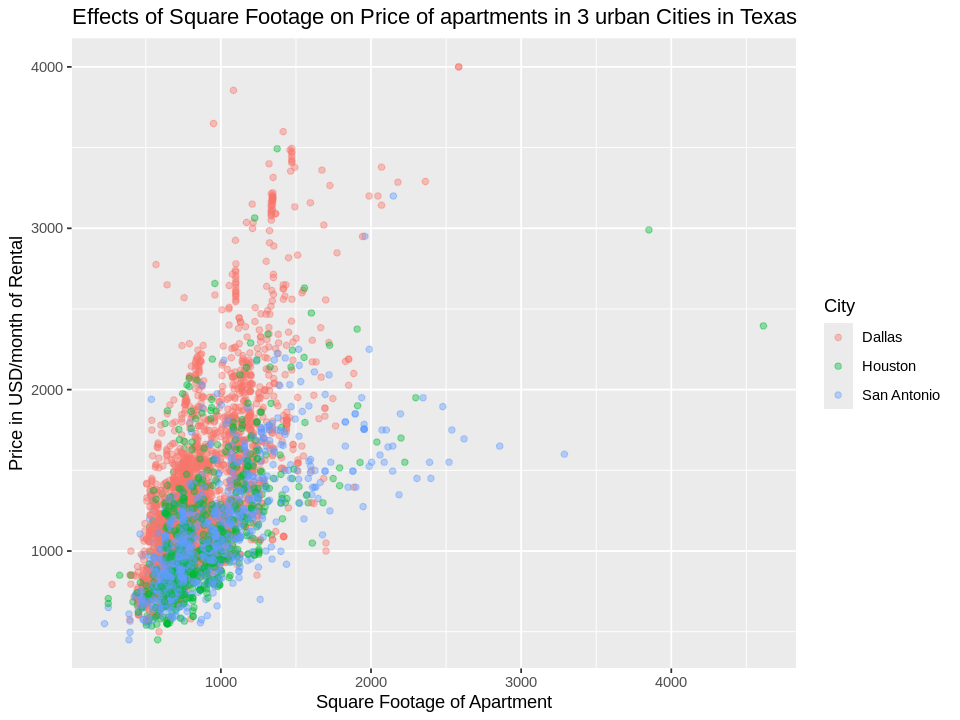

In [7]:
#The following code is use to create a scatter plot of the dataset "apt_texas_cities".
#This scatter plot will use as visualization for exploratory analysis to create some prediction before our actual analysis.
options(repr.plot.width = 8, repr.plot.height = 6)
plot_texas_cities <- apt_texas_cities |>
    ggplot(aes (x = square_feet, y = price))+
    geom_point(alpha = 0.4, aes(color = cityname))+
    labs(x = "Square Footage of Apartment", y = "Price in USD/month of Rental", color = "City", 
            title = "Effects of Square Footage on Price of apartments in 3 urban Cities in Texas")
#Our code for plotting uses square feet on the x-axis and price on the y-axis as we are trying to see if the size of
#the apartment have any effect on the price.

plot_texas_cities

_Figure 6: A plot of Price vs Square Footage of the top 3 cities in Texas (Dallas, Houston, San Antonio)._

In [8]:
#The following code is to produce a brief summary table of the data that we will analyze. This is created mainly to compare face value of the 3 cities.
summary_table <- apt_texas_cities |>
  group_by(cityname) |>
  summarize(
    num_observations = n(),
    mean_bathrooms = mean(bathrooms),
    mean_bedrooms = mean(bedrooms),
    mean_square_feet = mean(square_feet, na.rm = TRUE),
    mean_price = mean(price, na.rm = TRUE))
  
summary_table

cityname    num_observations mean_bathrooms mean_bedrooms mean_square_feet
1 Dallas      2798             1.363474       1.480343      870.2423        
2 Houston      739             1.302436       1.461434      869.0961        
3 San Antonio  873             1.430126       1.640321      936.6770        
  mean_price
1 1340.039  
2 1091.018  
3 1111.101

_Figure 7: A summary table that contains the mean count of the number of bathrooms and bedrooms. As well as the mean price and square footage from the top 3 cities. The purpose of this is to explore the data._ 

### Methods: Data Analysis

To execute our analysis - we will use linear regression. To understand the trend and relationship between how square footage affect prices of rental, linear regression is preferred in this scenario as in **Figure 6**, the data points are very clustered and there is a noticeable positive relationship. Confirming that linear regression is ideal to effectively answer our guiding question.

To start - we will compute the linear regression for the top 3 cities in Texas as a whole to answer our first question.

In [9]:
#First, we will split the dataset apt_texas_cities into training and testing data.
#We do this to train the model using the training data and then testing it to see how well our model for regression is.

set.seed(2000) #DO NOT CHANGE SEED - this allows for the data to be reproducible
texas_split <- initial_split(apt_texas_cities, prop = 0.75, strata = price)
texas_train <- training(texas_split)
texas_test <- testing(texas_split)

#The above 3 line of code is splitting the data set into 75% will be trained - 25% will be tested (tested is locked away).

In [10]:
#Next, we will create the model and recipe for our linear regression.
texas_spec <- linear_reg()|>
    set_engine("lm")|>
    set_mode("regression")

texas_recipe <- recipe(price ~ square_feet, data = texas_train)

#We have now created our model and recipe - we will then fit this.

texas_fit <- workflow ()|>
    add_recipe(texas_recipe)|>
    add_model(texas_spec)|>
    fit(data = texas_train)

texas_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)  square_feet  
    373.964        0.999  


We have now completed a model for the linear regression using our training data. The coeffecient for the y intercept is 374 - meaning when square feet is equal to 0 - the monthly rental starts at 374 US dollars. The slope=1  meaning for every increase in 1 square feet the rent price increases by 1$. This yields the equation: <center> **Rental price = 374 + 1 * (Square Footage)**

We will compute the RMSE and RMSPE for the model by fititng it to the dataset and see how well our model does.

In [11]:
#The following line of code is used to generate the RMSE from our testing set.
texas_train_results <- texas_fit |>
    predict(texas_train)|>
    bind_cols(texas_train)|>
    metrics(truth = price, estimate = .pred)|>
    filter(.metric == 'rmse')
texas_train_results

.metric .estimator .estimate
1 rmse    standard   380.4533

_Figure 8:Table that consist of the RMSE (error) between the trained model and the training set. From the RMSE, we see an error of $380.45._

In [12]:
#The following line of code is used to generate the RMSPE from our testing set.
texas_test_results <- texas_fit |>
    predict(texas_test)|>
    bind_cols(texas_test)|>
    metrics(truth = price, estimate = .pred)|>
    filter(.metric == 'rmse')
 texas_test_results

.metric .estimator .estimate
1 rmse    standard   383.4706

Figure 9: Table that consist of the RMSPE (error) between the trained model and the testing set. From the RMSE, we see an error of $383.47.

[1] "#619CFF" "#00BA38" "#F8766D"


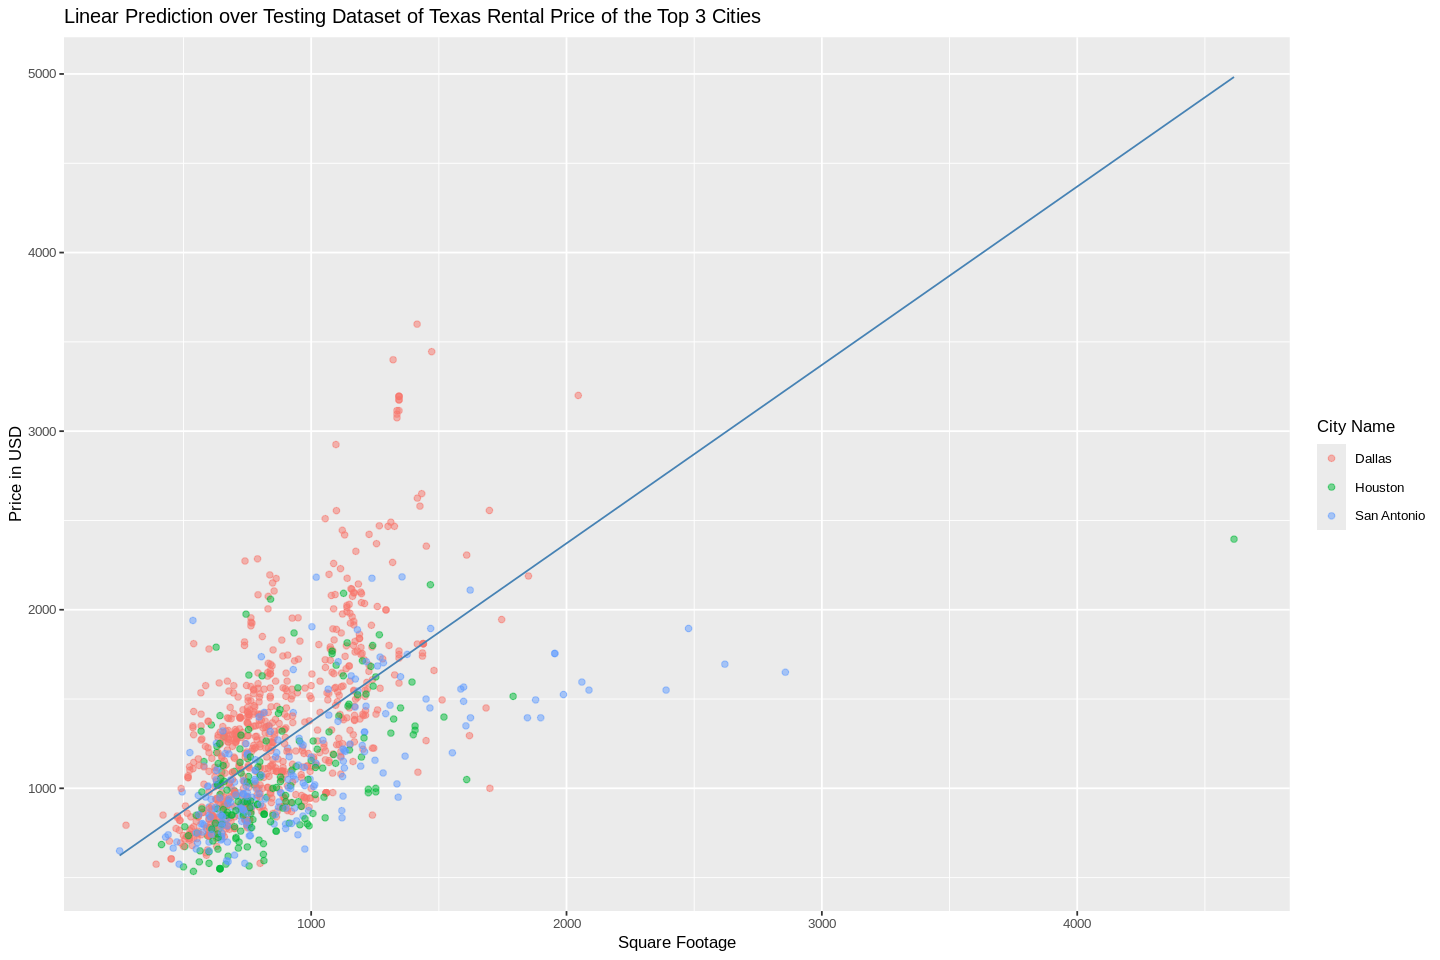

In [13]:
options(repr.plot.width = 12, repr.plot.height = 8)
#The following code is used to bind and predict our model with the testing set.
texas_preds <- texas_fit |>
    predict(texas_test)|>
    bind_cols(texas_test)
#This code will produce the plot of the testing dataset along with our predicted linear line overlaid on it.
#This plot will allow us to visuallize the trend in the testing dataset.

texas_predictions_test <- texas_preds |>
     ggplot(aes(x = square_feet, y = price)) +
         geom_point(alpha = 0.5, aes(color = cityname)) +
         geom_line(
             mapping = aes(x = square_feet, y = .pred), 
             color = "steelBlue") +
         labs(x = "Square Footage", y = "Price in USD",
             title = "Linear Prediction over Testing Dataset of Texas Rental Price of the Top 3 Cities",
             color = "City Name") +
         theme(text = element_text(size = 10))

texas_predictions_test
data <- ggplot_build(texas_predictions_test)$data[[1]]
unique_colors <- unique(data$colour)
print(unique_colors)

_Figure 10: Plot of fitted linear line over the testing dataset of the rentals in the top 3 cities of Texas_

This figure is representative of the predicted trend that is present for the relationship of square footage to price for rentals in the top three cities in Texas. The line produced from this analysis has a positive slope, reflecting the nature of the relationship. As the price of rentals increases so does the amount of square footage. This allows us to determine that there is a positive weak linear relationship between our two variables. Upon closer inspection of the graph it is apparent that the majority of rentals are under 2000 square feet. There are very minimal rentals available that are over 2000 square feet. It is also important to note that the majority of rentals in Dallas are on the higher end of the price range as they exceed the value of the predictive line for that amount of square footage. These observations are imperative to our understanding of the dataset and allow us to improve our analysis methods. 

Next, we will answer our next question by applying the model and fit it to the top 3 urban cities that we found, which are **Dallas**, **Houston**, and **San Antonio**. To do this, we will **NOT** make a new model for each city but instead will apply the existing model for Texas on to the testing dataset for each city. The testing set will be the same dataset that we split earlier for Texas, but will be filtered for the according city.

We would do this because we want to see how accurate does the correlation found from Texas applied to each of our city (which is our 2nd predictive questions).

In [14]:
#This line of code is simply filtering for only the city of Dallas from the testing dataset created above.
dallas_test <- texas_test|>
                filter(cityname == "Dallas")
head(dallas_test)

category  bathrooms bedrooms price square_feet cityname state
1 Apartment 1         1        1391  677         Dallas   TX   
2 Apartment 1         1         910  644         Dallas   TX   
3 Apartment 1         1        1686  847         Dallas   TX   
4 Apartment 1         1         845  476         Dallas   TX   
5 Apartment 1         1        1576  747         Dallas   TX   
6 Apartment 1         1         850  420         Dallas   TX

_Figure 11: A table of the first 6 rows of the testing dataset for Dallas_

In [15]:
#This line of code is simply filtering for only the city of Houston from the testing dataset created above.
houston_test <- texas_test|>
                filter(cityname == "Houston")
head(houston_test)

category  bathrooms bedrooms price square_feet cityname state
1 Apartment 1.0       1         535   539        Houston  TX   
2 Apartment 1.0       1        1150   580        Houston  TX   
3 Apartment 3.5       5        2395  4614        Houston  TX   
4 Apartment 1.0       1         950   826        Houston  TX   
5 Apartment 1.0       1        1029   759        Houston  TX   
6 Apartment 1.0       1         932   675        Houston  TX

_Figure 12: A table of the first 6 rows of the testing dataset for Houston_

In [16]:
#This line of code is simply filtering for only the city of San Antonio from the testing dataset created above.
san_antonio_test <- texas_test|>
                filter(cityname == "San Antonio")
head(san_antonio_test)

category  bathrooms bedrooms price square_feet cityname    state
1 Apartment 1         1         975  882         San Antonio TX   
2 Apartment 1         1         895  690         San Antonio TX   
3 Apartment 1         1         884  622         San Antonio TX   
4 Apartment 1         1        1012  646         San Antonio TX   
5 Apartment 1         1         734  758         San Antonio TX   
6 Apartment 1         1         710  646         San Antonio TX

_Figure 13: A table of the first 6 rows of the testing dataset for San Antonio_

In [17]:
#The following code is use to fit the model created from Texas earlier to the testing dataset of Dallas in order to find the RMSE.
dallas_test_results <- texas_fit |>
    predict(dallas_test)|>
    bind_cols(dallas_test)|>
    metrics(truth = price, estimate = .pred)|>
    filter(.metric == 'rmse')
dallas_test_results

.metric .estimator .estimate
1 rmse    standard   388.0687

_Figure 14: The table with the RMSPE value after fitting the regression model of Texas for Dallas. The RMSE is $388.7_

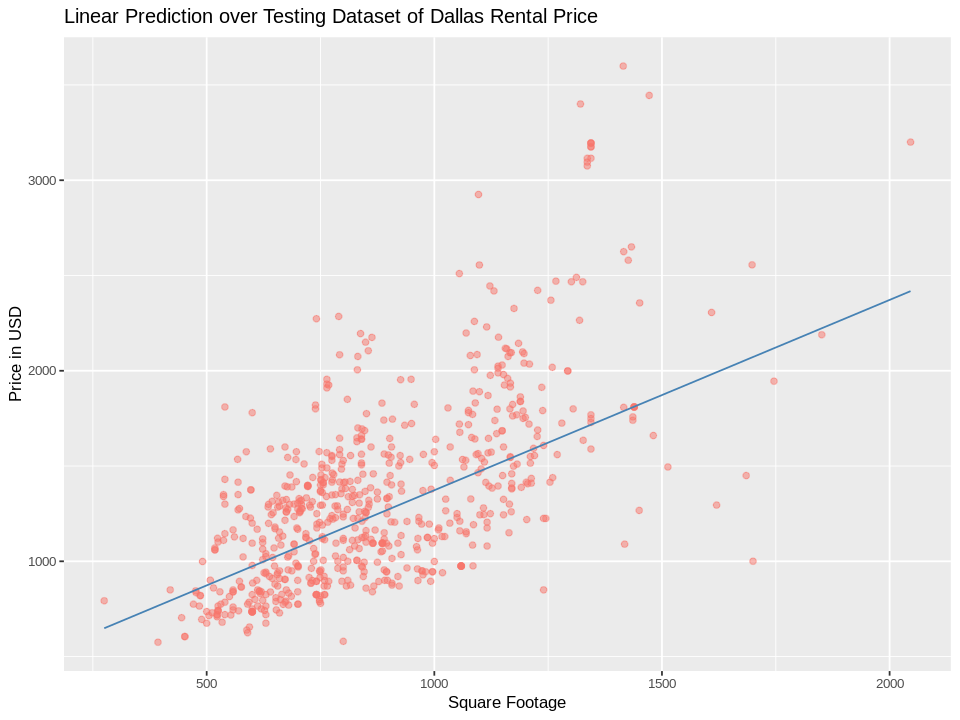

In [18]:
options(repr.plot.width = 8, repr.plot.height = 6)
#The following code is used to bind and predict our model with the testing set filtered for Dallas.
dallas_preds <- texas_fit |>
    predict(dallas_test)|>
    bind_cols(dallas_test)
#This code will produce the plot of the testing dataset along with our predicted linear line overlaid on it.
#This plot will allow us to visuallize the trend in the testing dataset.

dallas_predictions_test <- dallas_preds |>
     ggplot(aes(x = square_feet, y = price)) +
         geom_point(alpha = 0.5, color = "#F8766D") +
         geom_line(
             mapping = aes(x = square_feet, y = .pred), 
             color = "steelBlue") +
         labs(x = "Square Footage", y = "Price in USD",
             title = "Linear Prediction over Testing Dataset of Dallas Rental Price",
             color = "City Name") +
         theme(text = element_text(size = 10))

dallas_predictions_test

_Figure 15: Plot of fitted linear line over the testing dataset of the rentals of Dallas (fitted with model from Texas testing set)_

This figure shows the trend in the data for Dallas in Texas. The predictive line allows us to determine that the relationship between the square footage and the price of rentals is a weak positive relationship. The positive slope value indicates that as the square footage of rentals increases, the price also does. The data points are very spread out from the line, indicating that the correlation is present but is weak. Most data points are concentrated between square footage values of 500-1000 sqft. This indicates that the majority of available rentals fall under 1000 sqft. This figure allows us to determine that the trend for rentals in Dallas (from the testing dataset) is similar to Texas (Figure 9), as both figures showed a weak positive relationship. This part in our analysis is useful to us as it can allow us to predict the trends for future years and for the following cities. 


In [19]:
#We will do the same analysis as above from Dallas, and fit the Texas model to the city of Houston.
houston_test_results <- texas_fit |>
    predict(houston_test)|>
    bind_cols(houston_test)|>
    metrics(truth = price, estimate = .pred)|>
    filter(.metric == 'rmse')

houston_test_results

.metric .estimator .estimate
1 rmse    standard   380.5859

_Figure 16: The table with the RMSPE value after fitting the regression model of Texas for Houston. The RMSE is $380.60_

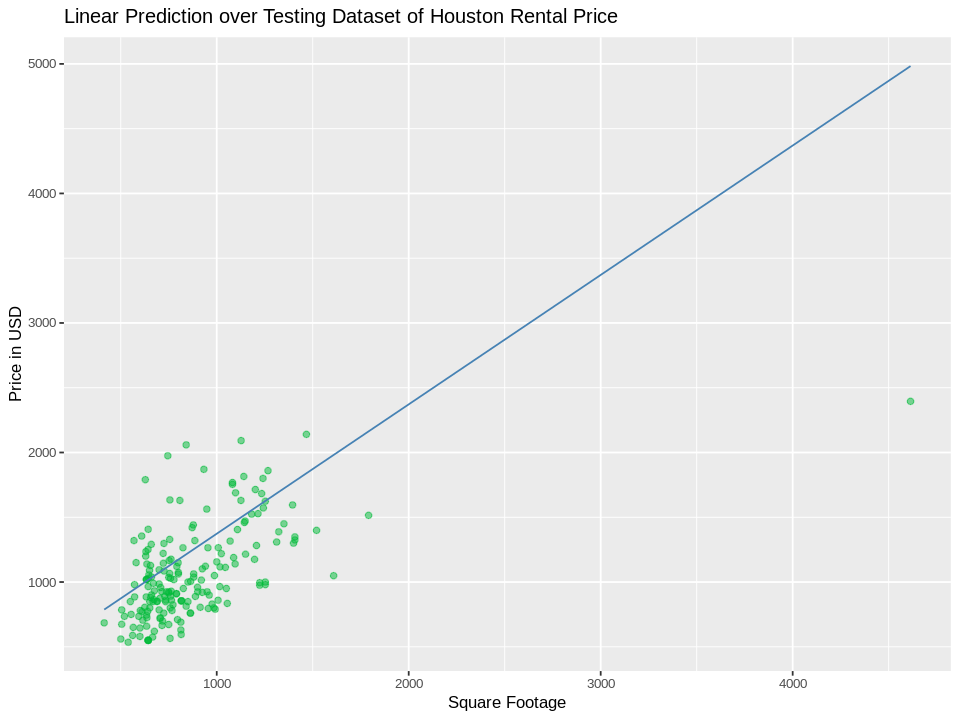

In [20]:
options(repr.plot.width = 8, repr.plot.height = 6)
#The following code is used to bind and predict our model with the testing set filtered for Houston.
houston_preds <- texas_fit |>
    predict(houston_test)|>
    bind_cols(houston_test)
#This code will produce the plot of the testing dataset along with our predicted linear line overlaid on it.
#This plot will allow us to visuallize the trend in the testing dataset.

houston_predictions_test <- houston_preds |>
     ggplot(aes(x = square_feet, y = price)) +
         geom_point(alpha = 0.5, color = "#00BA38") +
         geom_line(
             mapping = aes(x = square_feet, y = .pred), 
             color = "steelBlue") +
         labs(x = "Square Footage", y = "Price in USD",
             title = "Linear Prediction over Testing Dataset of Houston Rental Price",
             color = "City Name") +
         theme(text = element_text(size = 10))

houston_predictions_test 

_Figure 17: Plot of fitted linear line over the testing dataset of the rentals of Houston (fitted with model from Texas testing set)_

This figure shows how the majority of rentals available in Houston are less than 1500 square feet. Compared to the number of rentals available in Dallas, Houston's market availability is significantly smaller. This demonstrates how Houston may not be contributing as many apartments to the state as a whole as some other cities. The relationship observed here is a positive weak one, this is apparent as only one available apartment is over 4000 square feet and the apartments under 2000 square feet are very clustered but spread out from the predictive line. 

In [21]:
san_antonio_test_results <- texas_fit |>
    predict(san_antonio_test)|>
    bind_cols(san_antonio_test)|>
    metrics(truth = price, estimate = .pred)|>
    filter(.metric == 'rmse')

san_antonio_test_results

.metric .estimator .estimate
1 rmse    standard   371.4303

_Figure 18: The table with the RMSPE value after fitting the regression model of Texas for San Antonio. The RMSE is $371.43_

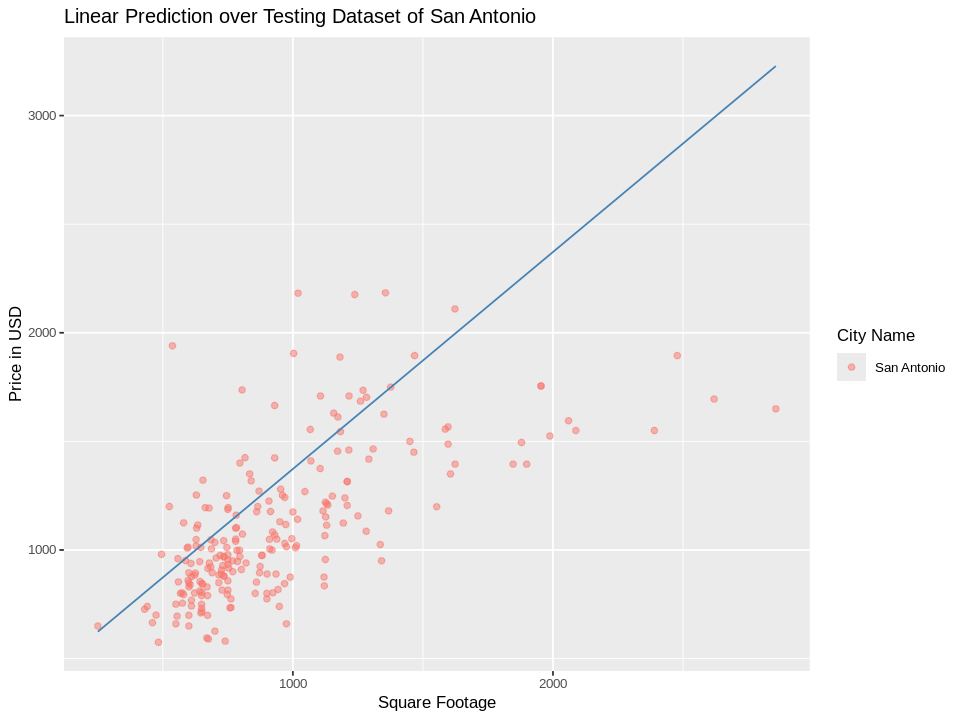

In [22]:
options(repr.plot.width = 8, repr.plot.height = 6)
#The following code is used to bind and predict our model with the testing set filtered for San Antonio.
san_antonio_preds <- texas_fit |>
    predict(san_antonio_test)|>
    bind_cols(san_antonio_test)
#This code will produce the plot of the testing dataset along with our predicted linear line overlaid on it.
#This plot will allow us to visuallize the trend in the testing dataset.

san_antonio_predictions_test <- san_antonio_preds |>
     ggplot(aes(x = square_feet, y = price)) +
         geom_point(alpha = 0.5, aes(color = cityname)) +
         geom_line(
             mapping = aes(x = square_feet, y = .pred), 
             color = "steelBlue") +
         labs(x = "Square Footage", y = "Price in USD",
             title = "Linear Prediction over Testing Dataset of San Antonio",
             color = "City Name") +
         theme(text = element_text(size = 10))

san_antonio_predictions_test 

_Figure 19: Plot of fitted linear line over the testing dataset of the rentals of San Antonio (fitted with model from Texas testing set)_

This figure of San Antonio displays less density for the availble apartments than the other plots we previously obtained in Figures 10, 15, and 17. The data points in this figure are very spread out. The range of square footages for these apartments is approximately between 200 sqft to just under 4000 sqft. The relationship between the two variables for this figure is a positive weak one. In this figure it is very apparent that as the square footage increases, the price does as well. This could be due to the fact that there are more apartments (data points) for rent available that are bigger compared to the previous cities we analyzed. 

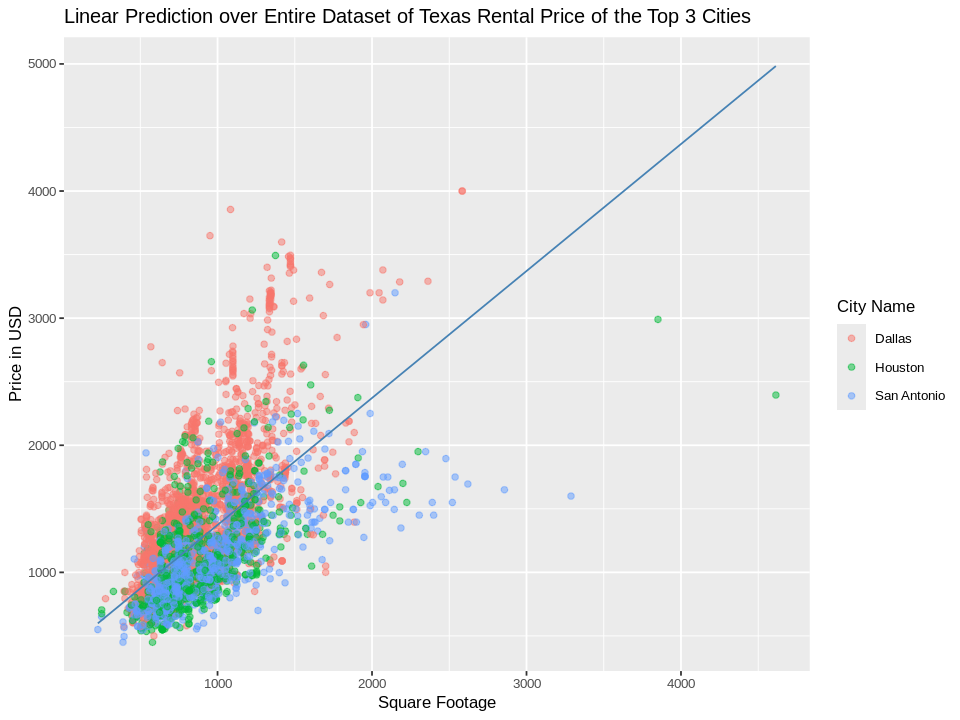

In [23]:
options(repr.plot.width = 8, repr.plot.height = 6)
#The following code is used to bind and predict our model with the ENTIRE DATASET
texas_plot_pred <- texas_fit |>
    predict(apt_texas_cities)|>
    bind_cols(apt_texas_cities)
#This code will produce the plot of the whole dataset along with our predicted linear line overlaid on it.
#This plot will allow us to visuallize the trend in the entire dataset
#The purpose of this plot is simply use as visual aid to see all the observation.
texas_plot <- texas_plot_pred |>
     ggplot(aes(x = square_feet, y = price)) +
         geom_point(alpha = 0.5, aes(color = cityname)) +
         geom_line(
             mapping = aes(x = square_feet, y = .pred), 
             color = "steelBlue") +
         labs(x = "Square Footage", y = "Price in USD",
             title = "Linear Prediction over Entire Dataset of Texas Rental Price of the Top 3 Cities",
             color = "City Name") +
         theme(text = element_text(size = 10))
texas_plot

_Figure 20: This plot is the model of that we trained EARLIER at the start of the entire state of Texas. This plot was just fitted with the prediction line overlaid to use as a visual guide. **IT WAS NOT TRAINED WITH ALL DATA**_

**No need to put anything here**

|City/State|RMSPE|
|----------|-----|
|Texas|383.47|
|Dallas|388.07|
|Houston|380.59|
|San Antonio|371.43|
<center> Figure 21: Compile table of all the RMSE value from each cities from fitting with the Texas model as well as the entire state of Texas.

We have now completed our analysis for all of the cities.

### Discussion and Results:

**Note**
we don't need to summarize the result from the graph as it is alrd done under the analysis.
Talk/elaborate on the RMSPE table and discuss what it might mean
Answer the discussion question required for the assignment (can use points I put in the google doc)

The analysis we have performed today allows us to make predictions regarding the future of rental prices in Texas. This dataset is from 2019 and from our analysis we determined that for the state of Texas as a whole and for the three cities we analyzed (Dallas, Houston, and San Antonio) there was a positive weak relationship between square footage and the price of rental units. This analysis can be used to infer future rental prices. Currently, for family homes in Dallas the selling price is down by 0.12% compared to 2023 (Redfin, n.d.). The median sale price per square foot is $249, compared to 2023 this is a 7.1% increase (Redfin, n.d.). This means that the trend established through our analysis of Dallas in 2019 is very much applicable to the current market. Commercial real estate in Dallas, Houston, Austin, and San Antonio is projected to decrease in rent by 3-4% by the end of 2024 (2024 Texas Real Estate Forecast, n.d.). The dataset we analyzed contained mostly apartments we did not account for the type of rental in our visualizations. To compare our data to commercial real estate in the current market we would need to do more analysis. 

A disadvantage of our analysis was that we were unable to see which apartments were from which area of the cities we analyzed. This introduces some error as there is natural fluctuation between certain areas of each city in the housing market. Meaning that it must be noted that while these urban cities are experiencing climbing rental prices it is a generalized statement. We cannot know for certain which areas of these cities are fluctuating in which way without doing more extensive research. Our analysis is a good indicator of how the housing market is changing and allows us to gain a deeper insight into which cities in Texas have the most availability and which are the most expensive. This proposes more questions such as: Which area of each city is cheapest to live in? Which city has the average cheapest price for the most square footage? The analysis completed in this project is an important asset in beginning to understand housing trends and relationships between certain variables which is important information to students like us who are looking to rent their first apartment.


Sources: 
2024 Texas Real Estate Forecast. (n.d.). Texas Real Estate Research Center. Retrieved April 9, 2024, from https://trerc.tamu.edu/article/2024-texas-real-estate-forecast-2407/

Redfin. (n.d.). Dallas Housing Market: House Prices & Trends | Redfin. Retrieved April 9, 2024, from https://www.redfin.com/city/30794/TX/Dallas/housing-market
